In [1]:
import csv
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Resource https://www.census.gov/quickfacts/fact/table/santaclaracountycalifornia,losangelescountycalifornia,contracostacountycalifornia,sanmateocountycalifornia,alamedacountycalifornia,sanfranciscocountycalifornia/PST045217

In [2]:
california_df = pd.read_csv('Quick Facts - California.csv')
california_df.drop(columns = ["Fact Note"], inplace=True)
california_df.drop(columns = ["Value Note for Santa Clara County, California"], inplace=True)
california_df.drop(columns = ["Value Note for Contra Costa County, California"], inplace=True)
california_df.drop(columns = ["Value Note for Los Angeles County, California"], inplace=True)
california_df.drop(columns = ["Value Note for San Mateo County, California"], inplace=True)
california_df.drop(columns = ["Value Note for Alameda County, California"], inplace=True)
california_df.drop(columns = ["Value Note for San Francisco County, California"], inplace=True)

# california_df = california_df[[]]


cols = list(california_df.columns.values)
cols

column_titles = ['Fact',
                'San Francisco County, California',
                'Alameda County, California', 
                 'San Mateo County, California',
                'Contra Costa County, California', 
                 'Los Angeles County, California',
                'Santa Clara County, California']

california_df.reindex(columns = column_titles)



,Fact,"San Francisco County, California","Alameda County, California","San Mateo County, California","Contra Costa County, California","Los Angeles County, California","Santa Clara County, California"
0,"Population estimates, July 1, 2018, (V2018)",NaN,NaN,NaN,NaN,NaN,NaN
1,"Population estimates, July 1, 2017, (V2017)","884,363","1,663,190","771,410","1,147,439","10,163,507","1,938,153"
2,"Population estimates base, April 1, 2010, (V2...",NaN,NaN,NaN,NaN,NaN,NaN
3,"Population estimates base, April 1, 2010, (V2...","805,193","1,510,261","718,500","1,049,200","9,818,696","1,781,671"
4,"Population, percent change - April 1, 2010 (es...",NaN,NaN,NaN,NaN,NaN,NaN
5,"Population, percent change - April 1, 2010 (es...",9.8%,10.1%,7.4%,9.4%,3.5%,8.8%
6,"Population, Census, April 1, 2010","805,235","1,510,271","718,451","1,049,025","9,818,605","1,781,642"
7,"Persons under 5 years, percent",4.5%,5.9%,5.7%,5.7%,6.1%,6.1%
8,"Persons under 18 years, percent",13.4%,20.7%,20.8%,22.8%,21.9%,22.2%
9,"Persons 65 years and over, percent",15.4%,13.5%,15.8%,15.3%,13.2%,13.1%


In [3]:
#Pulling Race Information
california_race = california_df.iloc[11:18,0:7]
california_race




,Fact,"Santa Clara County, California","Los Angeles County, California","Contra Costa County, California","San Mateo County, California","Alameda County, California","San Francisco County, California"
11,"White alone, percent",53.8%,70.9%,65.9%,60.6%,50.2%,53.1%
12,"Black or African American alone, percent",2.8%,9.0%,9.5%,2.8%,11.3%,5.5%
13,"American Indian and Alaska Native alone, percent",1.2%,1.4%,1.0%,0.8%,1.1%,0.7%
14,"Asian alone, percent",37.5%,15.3%,17.7%,29.6%,31.1%,35.9%
15,Native Hawaiian and Other Pacific Islander alo...,0.5%,0.4%,0.6%,1.5%,1.0%,0.4%
16,"Two or More Races, percent",4.1%,3.0%,5.3%,4.6%,5.3%,4.3%
17,"Hispanic or Latino, percent",25.6%,48.6%,25.7%,24.5%,22.5%,15.2%


In [4]:
#Used Lambda to convert to Float
california_race['Santa Clara County, California'] = california_race['Santa Clara County, California'].apply(lambda x: float(x[:-1]))
california_race['Los Angeles County, California'] = california_race['Los Angeles County, California'].apply(lambda x: float(x[:-1]))
california_race['Contra Costa County, California'] = california_race['Contra Costa County, California'].apply(lambda x: float(x[:-1]))
california_race['San Mateo County, California'] = california_race['San Mateo County, California'].apply(lambda x: float(x[:-1]))
california_race['Alameda County, California'] = california_race['Alameda County, California'].apply(lambda x: float(x[:-1]))
california_race['San Francisco County, California'] = california_race['San Francisco County, California'].apply(lambda x: float(x[:-1]))

#Removed ",percent"
california_race['Fact'] = california_race['Fact'].apply(lambda x: x[:-9])
california_race

,Fact,"Santa Clara County, California","Los Angeles County, California","Contra Costa County, California","San Mateo County, California","Alameda County, California","San Francisco County, California"
11,White alone,53.8,70.9,65.9,60.6,50.2,53.1
12,Black or African American alone,2.8,9.0,9.5,2.8,11.3,5.5
13,American Indian and Alaska Native alone,1.2,1.4,1.0,0.8,1.1,0.7
14,Asian alone,37.5,15.3,17.7,29.6,31.1,35.9
15,Native Hawaiian and Other Pacific Islander alone,0.5,0.4,0.6,1.5,1.0,0.4
16,Two or More Races,4.1,3.0,5.3,4.6,5.3,4.3
17,Hispanic or Latino,25.6,48.6,25.7,24.5,22.5,15.2


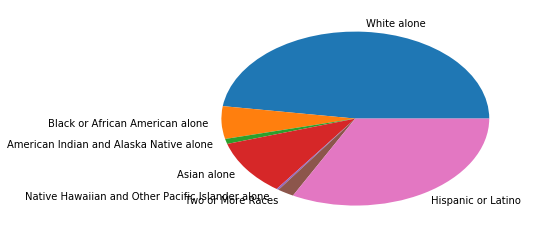

In [5]:
#Bar Chart + Pretty + San Francisco first

#Want to change the label in a legend on the side
plt.pie(california_race['Los Angeles County, California'],labels=california_race['Fact'])
plt.show()



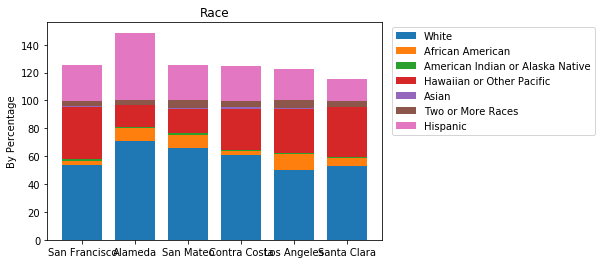

In [6]:
#Hispanic is over the 100% should we make it by itself or add it to "white"

race = ["White alone", "Black or African American Alone", "American Indian and Alaska Native alone", "Asian alone",
       "Native Hawaiian and Other PAcific Islander alone", "Two or More Races", "Hispanic or Latino"]

county = ['Santa Clara County, California', 'Los Angeles County, California', 'Contra Costa County, California', 
         'San Mateo County, California', 'Alameda County, California', 'San Francisco County, California']

N = 6
ind = np.arange(N)
width = .75

#White
white = california_race.iloc[0, 1:7]

#African America
aa = california_race.iloc[1, 1:7]

#American Indian & Alaska Native
ai = california_race.iloc[2, 1:7]

#Native Hawaiian and Other Pacific
hawaiian = california_race.iloc[3, 1:7]

#Asian
asian = california_race.iloc[4, 1:7]

#Two or More Races
two = california_race.iloc[5, 1:7]

#Hispanic or Latino
hispanic = california_race.iloc[6, 1:7]

p1 = plt.bar(ind,white,width)
p2 = plt.bar(ind,aa,width, bottom=white)
p3 = plt.bar(ind,ai,width, bottom=white+aa)
p4 = plt.bar(ind,hawaiian,width, bottom=white+aa+ai)
p5 = plt.bar(ind,asian,width, bottom=white+aa+ai+hawaiian)
p6 = plt.bar(ind,two,width, bottom =white+aa+ai+hawaiian+asian)
p7 = plt.bar(ind,hispanic,width, bottom =white+aa+ai+hawaiian+asian+two)




plt.ylabel('By Percentage')
plt.title('Race')
plt.xticks(ind, ('San Francisco', 'Alameda', 'San Mateo', 'Contra Costa',
                'Los Angeles', 'Santa Clara'))

plt.legend((p1[0], p2[0], p3[0], 
            p4[0], p5[0],p6[0], p7[0]),
           ('White', 'African American', 
            'American Indian or Alaska Native',
            'Hawaiian or Other Pacific', 'Asian', 
            'Two or More Races', 'Hispanic'),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.show()


In [7]:
#Age

california_age =california_df.iloc[7:10,0:7]
california_age.head()

,Fact,"Santa Clara County, California","Los Angeles County, California","Contra Costa County, California","San Mateo County, California","Alameda County, California","San Francisco County, California"
7,"Persons under 5 years, percent",6.1%,6.1%,5.7%,5.7%,5.9%,4.5%
8,"Persons under 18 years, percent",22.2%,21.9%,22.8%,20.8%,20.7%,13.4%
9,"Persons 65 years and over, percent",13.1%,13.2%,15.3%,15.8%,13.5%,15.4%


In [8]:
california_age['Los Angeles County, California'] = california_age['Los Angeles County, California'].apply(lambda x: float(x[:-1]))
california_age['Santa Clara County, California'] = california_age['Santa Clara County, California'].apply(lambda x: float(x[:-1]))
california_age['Contra Costa County, California'] = california_age['Contra Costa County, California'].apply(lambda x: float(x[:-1]))
california_age['San Mateo County, California'] = california_age['San Mateo County, California'].apply(lambda x: float(x[:-1]))
california_age['Alameda County, California'] = california_age['Alameda County, California'].apply(lambda x: float(x[:-1]))
california_age['San Francisco County, California'] = california_age['San Francisco County, California'].apply(lambda x: float(x[:-1]))


california_age['Fact'] = california_age['Fact'].apply(lambda x: x[:-9])
california_age




,Fact,"Santa Clara County, California","Los Angeles County, California","Contra Costa County, California","San Mateo County, California","Alameda County, California","San Francisco County, California"
7,Persons under 5 years,6.1,6.1,5.7,5.7,5.9,4.5
8,Persons under 18 years,22.2,21.9,22.8,20.8,20.7,13.4
9,Persons 65 years and over,13.1,13.2,15.3,15.8,13.5,15.4


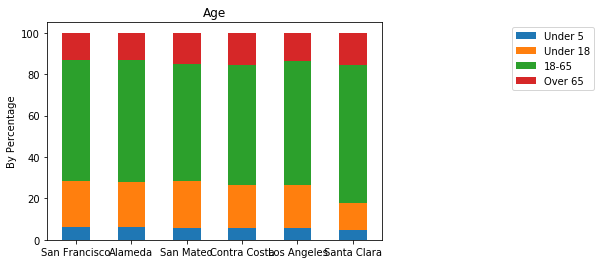

In [9]:


county = ['Santa Clara County, California', 'Los Angeles County, California', 'Contra Costa County, California', 
         'San Mateo County, California', 'Alameda County, California', 'San Francisco County, California']

age = ['under 5 years','under 18 years','65 years and over, percent']

N = 6
ind = np.arange(N)
width = 0.50


#Under 5
under_5 = california_age.iloc[0, 1:7]

#Under 18
under_18 = california_age.iloc[1, 1:7]

#Over 65
over_65 = california_age.iloc[2, 1:7]

#18-65
middle_age = 100-under_5-under_18-over_65


#Plot
p1 = plt.bar(ind,under_5,width)
p2 = plt.bar(ind,under_18,width,bottom=under_5)
p3 = plt.bar(ind,middle_age, width,bottom=under_5+under_18)
p4 = plt.bar(ind,over_65,width,bottom=under_5+under_18+middle_age)

plt.legend((p1[0], p2[0], p3[0],p4[0]),
           ('Under 5', 'Under 18', '18-65', 
            'Over 65',),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('Age')
plt.xticks(ind, ('San Francisco', 'Alameda', 'San Mateo', 'Contra Costa',
                'Los Angeles', 'Santa Clara'))

plt.show()

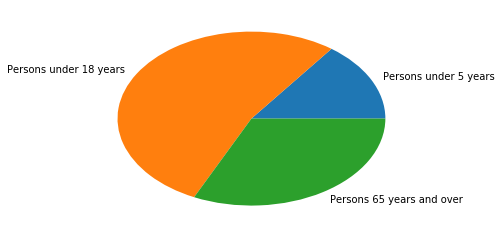

In [10]:
plt.pie(california_age['Los Angeles County, California'],labels=california_age['Fact'])
plt.show()

In [11]:
#Sex
california_sex = california_df.iloc[10:11,0:7]
california_sex = pd.DataFrame(california_sex)
california_sex

,Fact,"Santa Clara County, California","Los Angeles County, California","Contra Costa County, California","San Mateo County, California","Alameda County, California","San Francisco County, California"
10,"Female persons, percent",49.5%,50.7%,51.1%,50.7%,50.8%,49.0%


In [12]:
california_sex['Los Angeles County, California'] = california_sex['Los Angeles County, California'].apply(lambda x: float(x[:-1]))
california_sex['Santa Clara County, California'] = california_sex['Santa Clara County, California'].apply(lambda x: float(x[:-1]))
california_sex['Contra Costa County, California'] = california_sex['Contra Costa County, California'].apply(lambda x: float(x[:-1]))
california_sex['San Mateo County, California'] = california_sex['San Mateo County, California'].apply(lambda x: float(x[:-1]))
california_sex['Alameda County, California'] = california_sex['Alameda County, California'].apply(lambda x: float(x[:-1]))
california_sex['San Francisco County, California'] = california_sex['San Francisco County, California'].apply(lambda x: float(x[:-1]))

california_sex['Fact'] = california_age['Fact'].apply(lambda x: x[:-9])

california_sex

,Fact,"Santa Clara County, California","Los Angeles County, California","Contra Costa County, California","San Mateo County, California","Alameda County, California","San Francisco County, California"
10,NaN,49.5,50.7,51.1,50.7,50.8,49.0


In [13]:
female = california_sex.iloc[0]
female = female.drop('Los Angeles County, California')

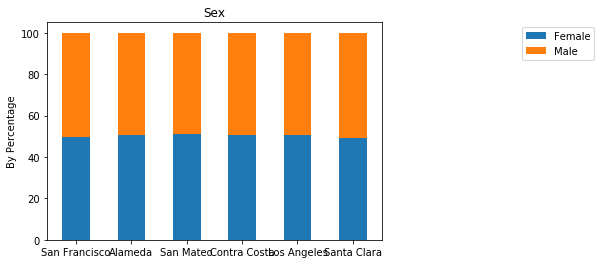

In [17]:
#Need to be stretched.

county = ['Santa Clara County, California', 'Los Angeles County, California', 'Contra Costa County, California', 
         'San Mateo County, California', 'Alameda County, California', 'San Francisco County, California']

N = 6
ind = np.arange(N)
width = 0.50

#Female
female = california_sex.iloc[0, 1:7]

#Male
male_sex = 100-female


#Plot
p1 = plt.bar(ind,female,width)
p2 = plt.bar(ind,male_sex,width,bottom=female)

plt.legend((p1[0], p2[0]),
           ('Female', 'Male'),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('Sex')
plt.xticks(ind, ('San Francisco', 'Alameda', 'San Mateo', 'Contra Costa',
                'Los Angeles', 'Santa Clara'))

plt.show()

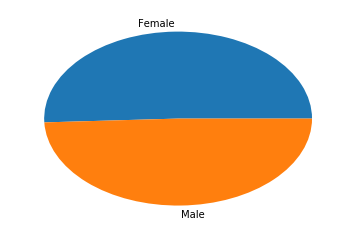